## 추정 (Estimation)

- 통계적 추정 이론
- 모집단의 모수를 추정함 
- **모집단분포**가 **정규분포**라면 t-분포를 이용해 모수를 추정할 수 있음



In [19]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

import random as rd

sns.set()

%precision 3
%matplotlib inline

### 데이터 준비

- 100,000 마리 중 10마리 추출


In [20]:
whole = np.random.normal(loc=4, scale=0.8, size=100000)

fish = np.random.choice(whole, size=50, replace=False)

In [21]:
fish

array([3.85 , 2.016, 3.02 , 3.02 , 3.582, 3.864, 2.847, 2.976, 5.218,
       4.171, 4.632, 3.228, 3.428, 2.624, 4.119, 3.009, 3.792, 5.008,
       4.31 , 2.486, 3.654, 4.996, 5.39 , 4.399, 4.811, 3.53 , 4.489,
       4.121, 4.523, 2.607, 5.064, 3.648, 4.148, 4.137, 3.268, 3.75 ,
       2.969, 5.545, 4.122, 4.755, 3.369, 3.195, 3.434, 4.51 , 5.364,
       3.684, 3.676, 3.641, 2.955, 4.393])

### 점추정

- 모수를 하나의 숫자로 계산해 내는 방법
- 예를 들면 표본평균 하나로 나타냄 

In [22]:
fish.mean()

3.8668992762291943

### 구간추정

- 추정값을 점이 아니라 존재할 것으로 예상되는 구간으로 나타내는 것 
- 확률개념이 도입됨
- 추정오차가 작으면 구간추정의 폭이 좁아짐 (더 정확해짐!)
- 샘플사이즈가 커지면 구간추정의 폭은 좁아짐 (더 정확해짐!)

### 신뢰계수
- 구간추정의 폭에 대한 신뢰정도 (모수가 그 안에 있을 확률, 95%, 99%)

### 신뢰구간
- 특정 신뢰계수를 만족하는 구간

### 신뢰한계
- 신뢰구간의 상한, 하한값

### 신뢰구간 계산 방법
- t-분포를 이용함 

$$ t=\frac{\hat{\mu}-\mu}{\frac{\hat{\sigma}}{\sqrt{N}}} $$

$$ t= \frac{표본평균-모평균}{표준오차} $$

In [26]:
x = np.arange(-5, 5.1, 0.1)
stats.t.pdf(x=x, df=5)

array([0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004,
       0.005, 0.005, 0.006, 0.006, 0.007, 0.008, 0.009, 0.01 , 0.012,
       0.013, 0.015, 0.017, 0.02 , 0.022, 0.026, 0.029, 0.033, 0.038,
       0.044, 0.05 , 0.057, 0.065, 0.074, 0.085, 0.097, 0.11 , 0.125,
       0.141, 0.158, 0.178, 0.198, 0.22 , 0.242, 0.264, 0.287, 0.308,
       0.328, 0.345, 0.36 , 0.371, 0.377, 0.38 , 0.377, 0.371, 0.36 ,
       0.345, 0.328, 0.308, 0.287, 0.264, 0.242, 0.22 , 0.198, 0.178,
       0.158, 0.141, 0.125, 0.11 , 0.097, 0.085, 0.074, 0.065, 0.057,
       0.05 , 0.044, 0.038, 0.033, 0.029, 0.026, 0.022, 0.02 , 0.017,
       0.015, 0.013, 0.012, 0.01 , 0.009, 0.008, 0.007, 0.006, 0.006,
       0.005, 0.005, 0.004, 0.004, 0.003, 0.003, 0.003, 0.002, 0.002,
       0.002, 0.002])

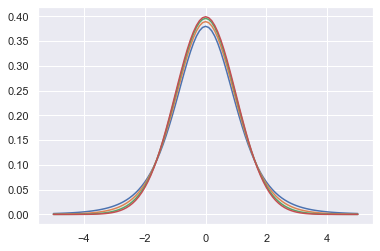

In [6]:
x = np.arange(-5, 5.1, 0.1)
plt.plot(x, stats.t.pdf(x, 5))
plt.plot(x, stats.t.pdf(x, 10))
plt.plot(x, stats.t.pdf(x, 30))
#plt.plot(x,stats.t.pdf(x, 50))

plt.plot(x,stats.norm.pdf(x))

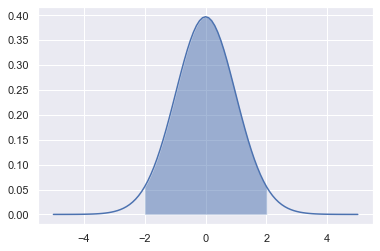

In [8]:
df = len(fish) - 1
x = np.arange(-5, 5.1, 0.1)
plt.plot(x, stats.t.pdf(x, df))
xxx = np.arange(stats.t.ppf(0.025,df), stats.t.ppf(0.975,df) + 0.01, 0.01)
yyy = stats.t.pdf(xxx, df)
plt.fill_between(xxx, 0, yyy, alpha=0.5)

In [9]:
fish.mean()

4.134212277043095

In [11]:
df = len(fish) - 1
stats.t.ppf(0.975, df)

2.009575234489209

In [12]:
df = len(fish) - 1
HCI = stats.t.ppf(0.975,df) * fish.std(ddof=1) / np.sqrt(len(fish))
print("신뢰구간은 ", fish.mean() - HCI, " ~ ", fish.mean() + HCI, " 입니다. 구간크기는 ", 2 * HCI, " 입니다.")

신뢰구간은  3.9279125114395868  ~  4.340512042646603  입니다. 구간크기는  0.4125995312070161  입니다.


### 신뢰구간 계산 방법
$$ \hat{\mu}-t_{-CI}\cdot {\frac{\hat{\sigma}}{\sqrt{N}}} <= \mu <= \hat{\mu}+t_{+CI}\cdot {\frac{\hat{\sigma}}{\sqrt{N}}} $$

1. $\hat{\sigma}$를 구하고
2. $\sqrt{N}$로 나누어 표준오차를 구하고 줌
3. 신뢰계수 $t_{+CI}$를 구하고,
4. 표본평균 $\hat{\mu}$에 더하고 빼주어 
구간을 선정함

In [13]:
CI = fish.std(ddof=1) / np.sqrt(len(fish)) * stats.t.ppf(0.975, df)
CI

0.20629976560350805

In [14]:
print("신뢰구간은 ", fish.mean() - CI, "~", fish.mean() + CI, " 입니다.", " 신뢰구간의 폭은 ", 2 * CI, " 입니다.")

신뢰구간은  3.9279125114395868 ~ 4.340512042646603  입니다.  신뢰구간의 폭은  0.4125995312070161  입니다.


In [15]:
sz = 10
CC = 0.975

whole = np.random.normal(loc=4, scale=0.8, size=100000)

fish = np.random.choice(whole, size=sz, replace=False)

CI = fish.std(ddof=1) / np.sqrt(len(fish)) * stats.t.ppf(CC, df)

print("신뢰구간은 ", fish.mean() - CI, "~", fish.mean() + CI, " 입니다.", " 신뢰구간의 폭은 ", 2 * CI, " 입니다.")

신뢰구간은  3.6536457192179705 ~ 4.697375985533264  입니다.  신뢰구간의 폭은  1.043730266315293  입니다.


#### scipy.stats.t 함수를 이용하여 간단히 나타내기

In [27]:
conf_interval = stats.t.ppf((0.025, 0.975), df, loc=fish.mean(), scale=fish.std(ddof=1) / np.sqrt(len(fish)))
conf_interval

array([3.599, 4.134])

In [28]:
conf_interval[1] - conf_interval[0]

0.5351446497227275

### 신뢰계수 (95%)의 의미 

- 같은 작업을 10000번했을때, 틀릴 확률을 구해본다. 

In [29]:
whole = np.random.normal(loc=4, scale=0.8, size=100000)

sz = 10
df = sz - 1
counts = np.zeros(10000)

for i in range(10000):
    fish = np.random.choice(whole, size=sz, replace=False)
    temp = stats.t.ppf((0.005,0.995), df, loc=fish.mean(), scale=fish.std(ddof=1) / np.sqrt(len(fish)))
    if temp[0] < 4 and temp[1] > 4:
        counts[i] = 1
counts.sum() / 10000

0.9887

In [30]:
df

9